C:\Users\chand\AppData\Local\Temp\ipykernel_4212\2732476973.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv",index_col=0,header=0,squeeze=True,parse_dates=[0],date_parser=parser)


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


C:\Users\chand\AppData\Local\Temp\ipykernel_4212\2732476973.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


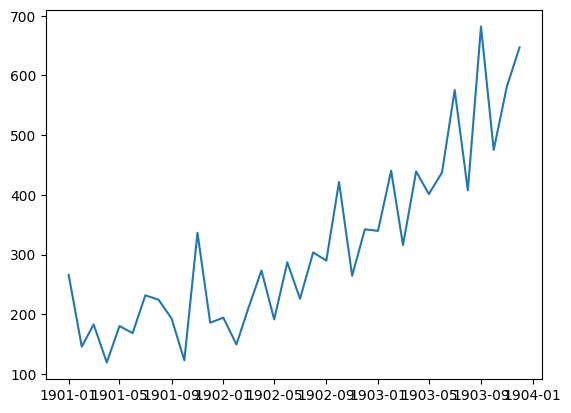

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv",index_col=0,header=0,squeeze=True,parse_dates=[0],date_parser=parser)
print(series.head())
plt.plot(series)
plt.show()

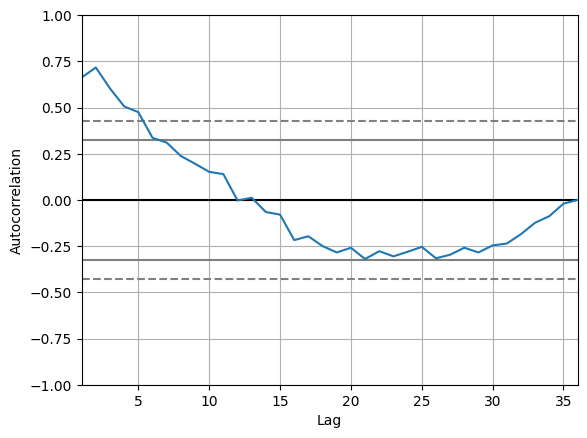

In [9]:
pd.plotting.autocorrelation_plot(series)
plt.show()

In [13]:
from statsmodels.tsa.arima.model import ARIMA
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv",index_col=0,header=0,squeeze=True,parse_dates=True,date_parser=parser)
series.index = series.index.to_period('M')

model = ARIMA(series,order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

C:\Users\chand\AppData\Local\Temp\ipykernel_4212\2591814233.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv",index_col=0,header=0,squeeze=True,parse_dates=True,date_parser=parser)
C:\Users\chand\AppData\Local\Temp\ipykernel_4212\2732476973.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Fri, 21 Apr 2023   AIC                            408.969
Time:                        22:09:15   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.798      -0.497       0.646
ar.L4          0.2519      0.340      0.742      0.458      -0.414       0.918
ar.L5          0.3344      0.210      1.593      0.111      -0.077       0.746
sigma2      4728.9608   1316.021      3.593      0.000    2149.607    7308.314
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.44   Prob(JB):                         0.62
Heteroskedasticity (H):               1.07   Skew:                             0.28
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

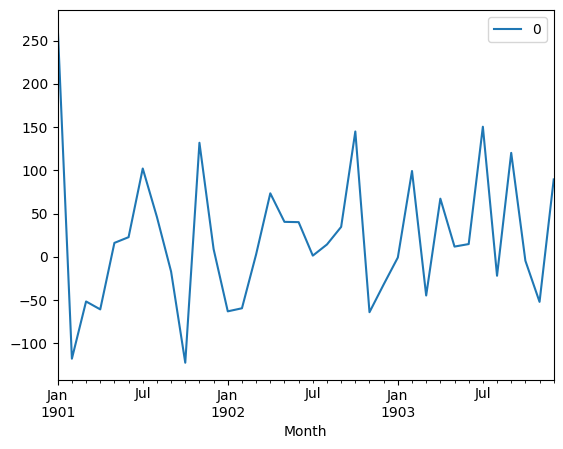

In [15]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

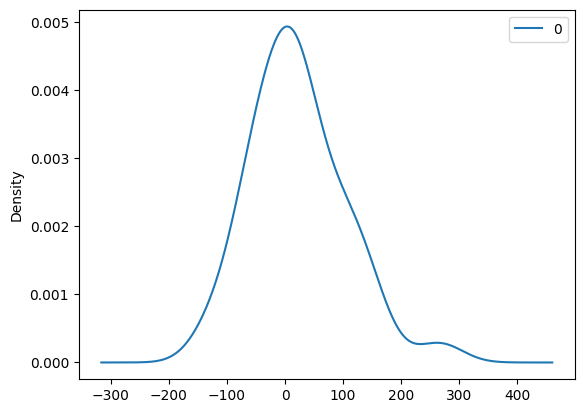

In [17]:
residuals.plot(kind='kde')
plt.show()

In [18]:
residuals.describe()

,0
count,36.000000
mean,21.936144
std,80.774430
min,-122.292030
25%,-35.040859
50%,13.147219
75%,68.848286
max,266.000000


C:\Users\chand\AppData\Local\Temp\ipykernel_4212\1044263269.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv",index_col=0,header=0,squeeze=True,parse_dates=True,date_parser=parser)
C:\Users\chand\AppData\Local\Temp\ipykernel_4212\2732476973.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE:89.021


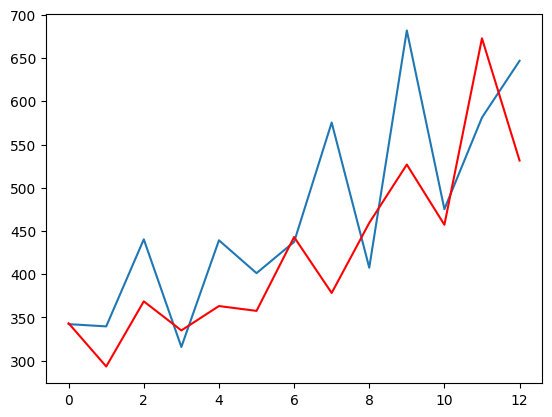

In [24]:
#evaluate the model
from math import sqrt
from sklearn.metrics import mean_squared_error
series = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv",index_col=0,header=0,squeeze=True,parse_dates=True,date_parser=parser)
series.index =series.index.to_period('M')
X = series.values
size = int(len(X)*0.66)
train,test = X[0:size],X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test,predictions))
print('Test RMSE:%.3f'%rmse)

plt.plot(test)
plt.plot(predictions,color='red')
plt.show()